# Continuous Control

---

In this notebook, you will use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

Begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
import time
from collections import deque
import numpy as np
import matplotlib.pyplot as plt
import torch
from unityagents import UnityEnvironment

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Train!

Now train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
We use DDPG here because our observation space as well as our action space are both continuous. DDPG is also a good choice for this problem because it allows us to keep separate exploration from exploitation via local and target networks. Also, in DDPG, the use of soft updates to the target networks aid learning stability.

In [5]:
def ddpg(scores, n_episodes=2000, t_max=1000, print_every=100):
    """Deep Deterministic Policy Gradients.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        t_max (int): maximum number of timesteps per episode
        print_every (int): print after this many episodes. Also used to define length of the deque buffer.
    """
    
    scores_window = deque(maxlen=print_every)  # last 100 scores
    for i_episode in range(1, n_episodes + 1):
        env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
        states = env_info.vector_observations                  # get the current state (for each agent)
        agent.reset()
        episode_scores = np.zeros(num_agents)                  # initialize the score (for each agent)
        t_step = 0
        while True:
            
            actions = agent.act(states) # based on the current states generate actions.

            env_info = env.step(actions)[brain_name]           # send all actions to the environment
            states_next = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episodes finished

            agent.step(states, actions, rewards, states_next, dones) # agent executes a step and learns
            
            states = states_next                               # roll over states to next time step
            episode_scores += rewards                          # update the score (for each agent)
            
            if np.any(dones):                                  # exit loop if episode finished
                break
                
            t_step += 1 # increment the number of steps seen this episode.
            if t_step >= t_max: # exit loop if episode finished
                episode_scores = episode_scores * 1000.0 / t_step
                break
        
        scores.append(np.mean(episode_scores))
        scores_window.append(np.mean(episode_scores))  # save most recent score
        print('\rEpisode {}\tCurrent Score: {:.2f}\tAverage Score: {:.2f}'.format(i_episode, scores[-1], np.mean(scores_window)), end="")
        if i_episode % print_every == 0:
            print('\rEpisode {}\tCurrent Score: {:.2f}\tAverage Score: {:.2f}'.format(i_episode, scores[-1], np.mean(scores_window)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')

        if np.mean(scores_window) >= 30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break

Import and load the agent

In [6]:
from ddpg_agent import Agent

agent = Agent(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=0)

In [7]:
# Uncomment the line below if you would like to load in previously trained weights.
# agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
# agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

scores = []  # list containing scores from each episode
t0 = time.time()
ddpg(scores, n_episodes=3000, t_max=1000)
print(time.time() - t0, 'seconds')

Episode 100	Current Score: 5.71	Average Score: 2.68
Episode 200	Current Score: 14.66	Average Score: 10.10
Episode 300	Current Score: 28.91	Average Score: 24.27
Episode 361	Current Score: 31.18	Average Score: 30.00
Environment solved in 361 episodes!	Average Score: 30.00
7607.817347764969 seconds


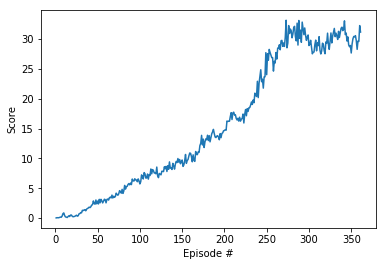

In [8]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores) + 1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

When finished, you can close the environment.

In [9]:
env.close()

## Ideas for future work
 * Implement prioritized experience replay or hindsight experience replay
 * Try and implement parameter space noise in place of Ornstein-Uhlenbeck noise.
 * Try and implement layer normalization in place of batch normalization. 
 * Implement different algorithms:
   - [ ] Trust Region Policy Optimization (TRPO)
   - [ ] Truncated Natural Policy Gradient (TNPG)
   - [ ] Proximal Policy Optimization (PPO)
   - [ ] Distributed Distributional Deterministic Policy Gradients (D4PG)
 * Try to solve a more difficult environment. (See Crawler.ipynb)